#Polymarket and Stock Correlation

https://colab.research.google.com/drive/1VeImACjgkKYMgeQW9SYtSTohJMrGUur0?usp=sharing

# --- 1. Define Project ---
##Project Goal: Analyze if Polymarket prediction market data can help forecast short-term stock market movements.

##Problem Type: Supervised Learning - Regression (or Binary Classification)
##Data Sources: Polymarket event market data, public stock market data (e.g., SPY from yfinance)
##Output: Next-day or next-3-day price change or direction of equity index/asset


#POLYMARKET DATA

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 3. Load and Visualize Polymarket Data ---
# Load CSV
pm_df = pd.read_csv("/content/polymarket-price-data-19-03-2025-27-06-2025-1751066658122.csv")
pm_df_info = pm_df.info()
pm_df_head = pm_df.head()
print(pm_df_info, pm_df_head) # features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date (UTC)        101 non-null    object 
 1   Timestamp (UTC)   101 non-null    int64  
 2   50+ bps decrease  101 non-null    float64
 3   25 bps decrease   101 non-null    float64
 4   No change         101 non-null    float64
 5   25+ bps increase  101 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB
None          Date (UTC)  Timestamp (UTC)  50+ bps decrease  25 bps decrease  \
0  03-20-2025 00:00       1742428805            0.0500            0.315   
1  03-21-2025 00:00       1742515205            0.0550            0.325   
2  03-22-2025 00:00       1742601606            0.0385            0.355   
3  03-23-2025 00:00       1742688006            0.0475            0.355   
4  03-24-2025 00:00       1742774405            0.0510            0.345   

  

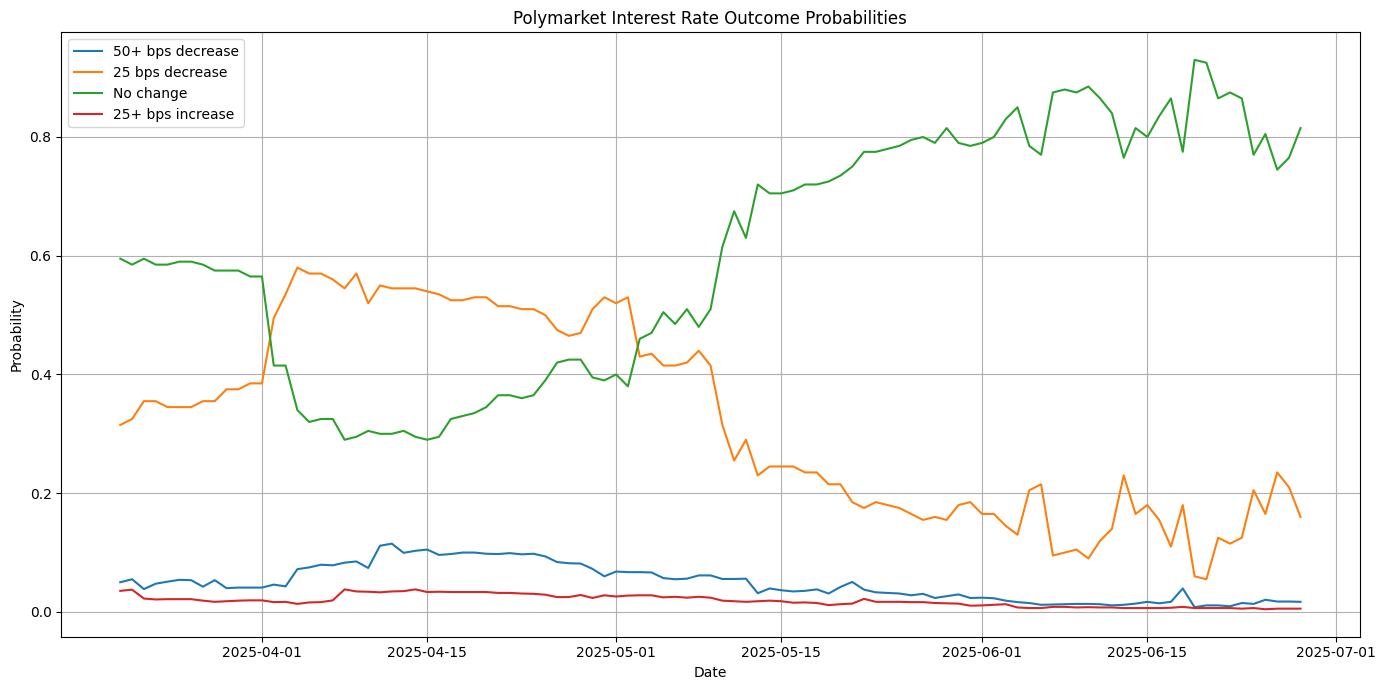

In [6]:
pm_df['Date'] = pd.to_datetime(pm_df['Date (UTC)'])
pm_df.set_index('Date', inplace=True)

# Plot all market probabilities over time
plt.figure(figsize=(14, 7))
for col in ['50+ bps decrease', '25 bps decrease', 'No change', '25+ bps increase']:
    plt.plot(pm_df.index, pm_df[col], label=col)

plt.title("Polymarket Interest Rate Outcome Probabilities")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Load and Visualize Polymarket Data ---
# Load CSV
pm_df = pd.read_csv("/content/polymarket-price-data-19-03-2025-27-06-2025-1751066658122.csv")
pm_df_info = pm_df.info()
pm_df_head = pm_df.head()
print(pm_df_info, pm_df_head) # features
pm_df['Date'] = pd.to_datetime(pm_df['Date (UTC)'])
pm_df.set_index('Date', inplace=True)

# Plot all market probabilities over time
plt.figure(figsize=(14, 7))
for col in ['50+ bps decrease', '25 bps decrease', 'No change', '25+ bps increase']:
    plt.plot(pm_df.index, pm_df[col], label=col)

plt.title("Polymarket Interest Rate Outcome Probabilities")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#NASDAQ DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        123 non-null    object 
 1   Close/Last  123 non-null    float64
 2   Volume      123 non-null    int64  
 3   Open        123 non-null    float64
 4   High        123 non-null    float64
 5   Low         123 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ KB


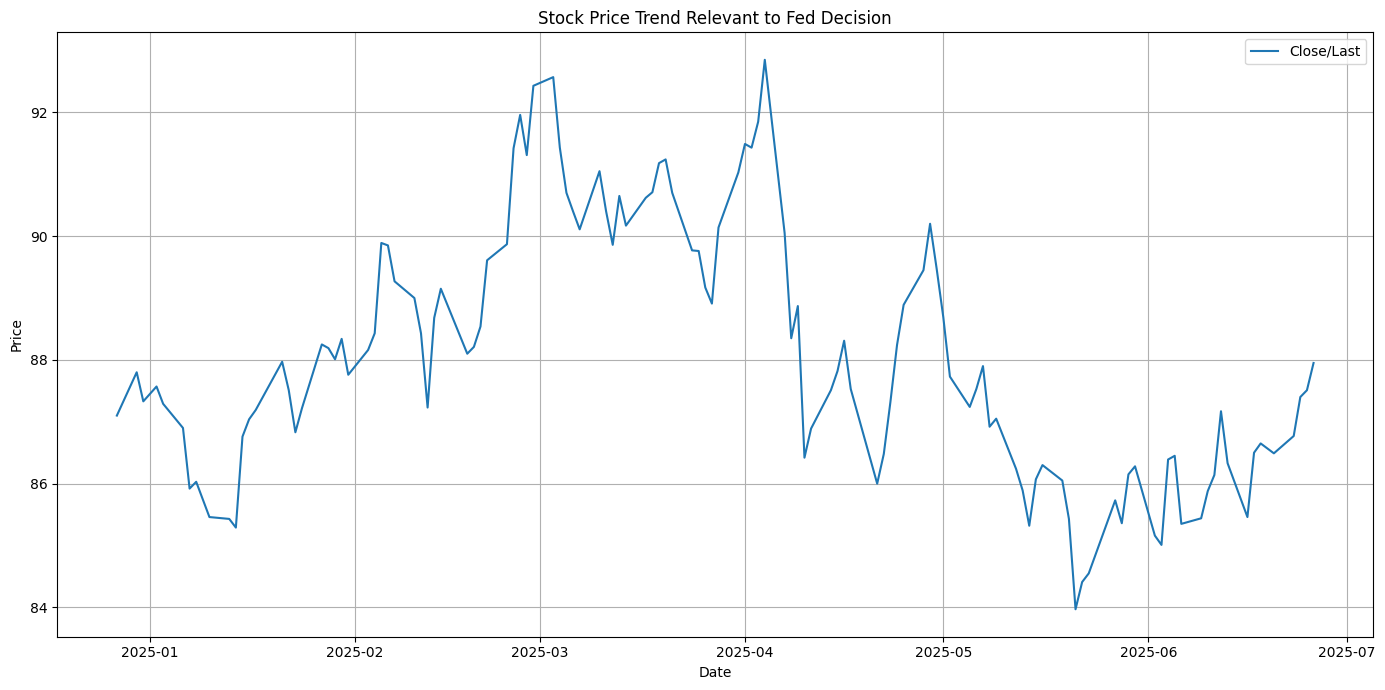

(None,
          Date  Close/Last    Volume   Open     High     Low
 0  06/26/2025       87.95  30467520  87.59  87.9500  87.200
 1  06/25/2025       87.51  26345290  87.11  87.5100  86.800
 2  06/24/2025       87.40  32959110  86.47  87.5900  86.425
 3  06/23/2025       86.77  36851820  86.93  87.4407  86.770
 4  06/20/2025       86.49  26001910  86.14  86.7900  85.950)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new CSV file
fed_stock_df = pd.read_csv("/content/HistoricalData_1751067548139.csv")

# Display structure and first few rows
fed_stock_info = fed_stock_df.info()
fed_stock_head = fed_stock_df.head()

# Convert 'Date' column to datetime and set as index
fed_stock_df['Date'] = pd.to_datetime(fed_stock_df['Date'])
fed_stock_df.set_index('Date', inplace=True)

# Plot all columns over time (excluding volume if present)
plot_cols = [col for col in fed_stock_df.columns if col.lower() not in ['volume', 'open', 'high', 'low']]

plt.figure(figsize=(14, 7))
for col in plot_cols:
    plt.plot(fed_stock_df.index, fed_stock_df[col], label=col)

plt.title("Stock Price Trend Relevant to Fed Decision")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fed_stock_info, fed_stock_head
